# Ejercicio N°7
Como en los TPs anteriores, elegir un problema de complejidad razonable y aplicar alguno/s de los métodos aquí presentados.
Pueden tomar los ejercicios anteriores si ya están familiarizados con los datasets, sobre todos los que tienen feature spaces muy grandes.

IMDB Rating: El datast contiene 5000+ películas, con 28 atributos y su calificación. El objetivo es predecir el ranking de una película a partir de sus atributos. https://github.com/manlio99/Materia-de-aprendizaje/tree/master/3_MidtermProjects/ProjectIMDB

In [37]:
# Import de lib a usar 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time

from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

# Funciones adicionales
# -----------------------------------------------------------------------------    
# Nclasss: nro de clases a mostrar
def hist_df_categorico(df,rows,cols,figsize = (20,8) ,Nclass=50):
    cols_categoricas = df.select_dtypes(include=['object']).columns;
        
    fig, ax = plt.subplots(rows,cols, figsize = figsize);
    fig.suptitle('BarPlots')
    plt.subplots_adjust(hspace=1.5)
    ax_row = -1;
    for i, categoria in enumerate(cols_categoricas):
      df_frec = df[categoria].value_counts();  
      if (i%cols == 0): ax_row = ax_row +1
      ax[ax_row][i%cols].bar(df_frec.index[:Nclass], df_frec[:Nclass])
      ax[ax_row][i%cols].tick_params(axis='x', rotation=90, labelsize=7)
      ax[ax_row][i%cols].set_title(categoria)

# -----------------------------------------------------------------------------    
def expand_var_categorica(df,categoria,clase_base):
# Para expandir/separar una columna que cantiene en cada celda mas de una clase
# df_clases: con las clases separadas por columnas
# df_clases_nulls: cantidad y proporción de datos faltantes por categoría
    df_clases = df[categoria].str.split('|', expand=True);
    df_clases.columns = [clase_base+f'{i}' for i in range(1, df_clases.shape[1] + 1)];
    df_clases_nulls = pd.DataFrame(df_clases.isnull().sum()); df_clases_nulls.columns = ['nulls'];
    df_clases_nulls['%nulls'] = 100*df_clases_nulls['nulls']/len(df);
    return(df_clases,df_clases_nulls)

## 1. Curación del dataset
### 1.1. Carga de datos y exploración inicial

In [23]:
# 0. Carga de datos
# -----------------------------------------------------------------------------
url_file = "https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectIMDB/data/movie_metadata.csv";
df_IMDB = pd.read_csv(url_file)
#
# 1. Exploración inicial
# 28 variables y 5mil aprox observaciones
# -----------------------------------------------------------------------------
df = df_IMDB.copy()
print(df.info())

print('Nro de clases por categoría: \n', df.nunique());
cols = df. columns;
cols_numericas = df.select_dtypes(include=['int', 'float']).columns;
cols_categoricas = df.select_dtypes(include=['object']).columns;

print('features numericas: ', pd.DataFrame(cols_numericas));
print('features categoricas: ', pd.DataFrame(cols_categoricas));
print('Del total de las features, {:3.2%} son num y {:3.2%} son categoricas'.format(
    len(cols_numericas)/len(cols),len(cols_categoricas)/len(cols)  ) )
      
dfismull = df[df.isnull().any(axis=1)]
print('Proporción de datos faltantes: {:3.2%}'.format(len(dfismull)/len(df)))#.format())
#df_outnull = df.dropna(axis=0);
#print(df_outnull.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

### 1.2.1 features numericas - visualización
### 1.2.2 features numericas - Política de datos faltantes
### 1.2.3 features numericas - Análisis de outliers
### 1.2.4 features numericas - Análisis de correlación
### 1.2.5 features numericas - Selección de features para la siguiente etapa


### 1.3.0 features categóricas - features ¿¿multiclase??
### 1.3.1 features categóricas - visualización
### 1.3.2 features categóricas - Política de datos faltantes
### 1.3.3 features categóricas - Análisis de outliers
### 1.3.4 features categóricas - Análisis de correlación
### 1.3.5 features categóricas - Selección de features para la siguiente etapa

### 1.3.0 features categóricas - features ¿¿multiclase??

# Analisis de las features categóricas
- **genres**: Dada la excesiva proporción de datos faltantes en algunos géneros (mas del 70%), y para no incorporar columnas con datos faltantes se mantiene 'genero1' y  'genero2'.

- **plot_keywords**: De las 5 clases distintas de keywords se mantienen las features 'word1','word2' y 'word3' donde los datos faltantes es menor al 5%.
Obs: para tener consideración despues, es que en varios casos las palabras clases son oraciones :(.



In [32]:
cat_splits = ['genres','plot_keywords']
df_expand1,stat = expand_var_categorica(df,cat_splits[0],'genero') 
display(df_expand1)
display(stat)

,genero1,genero2,genero3,genero4,genero5,genero6,genero7,genero8
0,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,Action,Adventure,Fantasy,None,None,None,None,None
2,Action,Adventure,Thriller,None,None,None,None,None
3,Action,Thriller,None,None,None,None,None,None
4,Documentary,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
5038,Comedy,Drama,None,None,None,None,None,None
5039,Crime,Drama,Mystery,Thriller,None,None,None,None
5040,Drama,Horror,Thriller,None,None,None,None,None
5041,Comedy,Drama,Romance,None,None,None,None,None


,nulls,%nulls
genero1,0,0.000000
genero2,633,12.552052
genero3,1988,39.420980
genero4,3616,71.703351
genero5,4597,91.156058
genero6,4946,98.076542
genero7,5021,99.563752
genero8,5039,99.920682


In [33]:
cat_splits = ['genres','plot_keywords']
df_expand2,stat = expand_var_categorica(df,cat_splits[1],'word') 
display(df_expand2)
display(stat)

,word1,word2,word3,word4,word5
0,avatar,future,marine,native,paraplegic
1,goddess,marriage ceremony,marriage proposal,pirate,singapore
2,bomb,espionage,sequel,spy,terrorist
3,deception,imprisonment,lawlessness,police officer,terrorist plot
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
5038,fraud,postal worker,prison,theft,trial
5039,cult,fbi,hideout,prison escape,serial killer
5040,NaN,NaN,NaN,NaN,NaN
5041,NaN,NaN,NaN,NaN,NaN


,nulls,%nulls
word1,153,3.033908
word2,194,3.846917
word3,225,4.461630
word4,254,5.036685
word5,292,5.790204


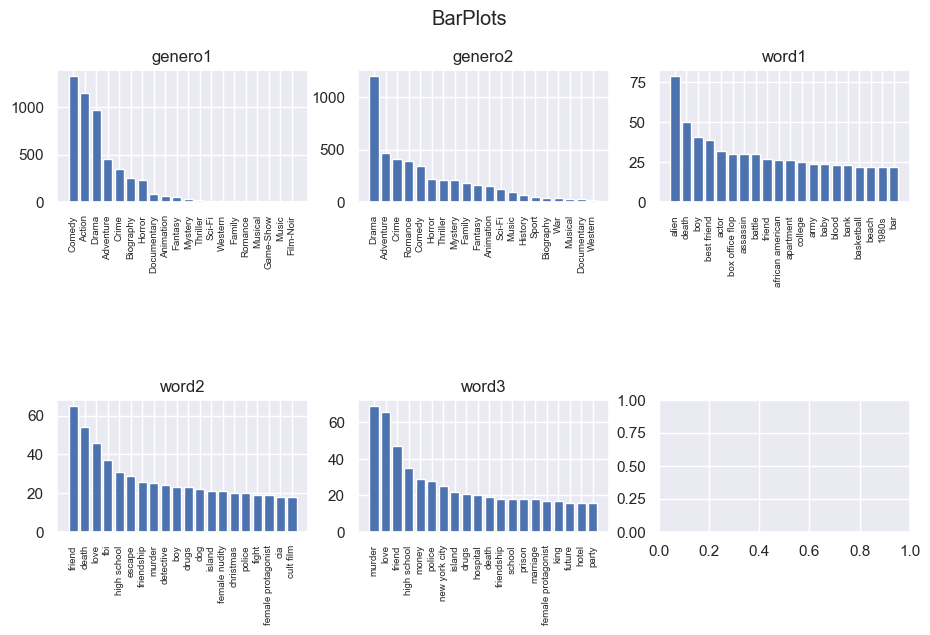

In [42]:
df_expand = pd.concat([  df_expand1.loc[:,'genero1':'genero2'],
                         df_expand2.loc[:,'word1':'word3']
                      ],axis=1);
hist_df_categorico(df_expand,2,3,figsize=(11,6),Nclass=20)


## Features que se mantendran
se decide quitar las varibles categoricas muy dispersas, esto es:
['actor_2_name','actor_3_name','movie_title','plot_keywords']

y las que tienen escasa variabilidad (casi deterministicas)
['language','country']

conclusion: ['actor_2_name','actor_3_name','movie_title','plot_keywords']+['language','country']
'''
outcat = ['actor_2_name','actor_3_name','movie_title','plot_keywords']+['language','country'];
df_small = df_outnull.drop(outcat,axis=1)
print('features numericas: ', pd.DataFrame(cols_numericas));

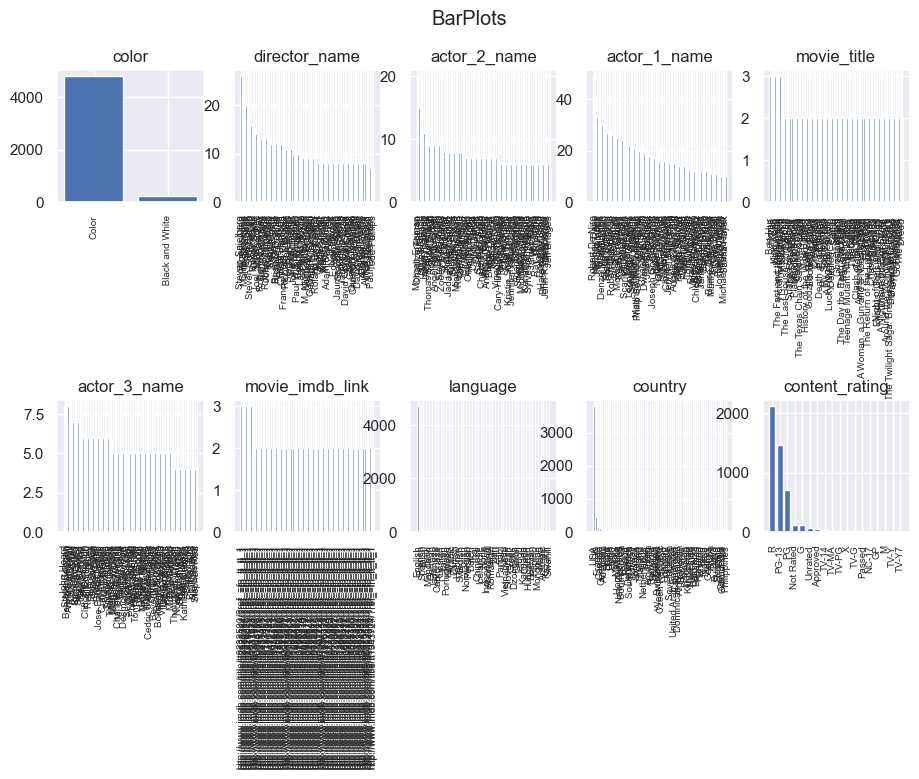

In [40]:
hist_df_categorico(df.drop(['genres','plot_keywords'],axis=1),2,5,figsize=(11,6),Nclass=80)


## Dataframe a procesar
dobre el data opriginal se agregan las features expandidas
